In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas as pd
path = ('AB4240.xlsx')
xl = pd.ExcelFile(path)
print(xl.sheet_names)

['ABETA', 'Demo', 'WM_hypo', 'cVolume', 'scVolume', 'hp_subfield', 'GM_int', 'Cognitive']


In [3]:
df_abeta=pd.read_excel(xl,'ABETA')
df_demo=pd.read_excel(xl,'Demo')
df_cognitive=pd.read_excel(xl,'Cognitive')
df_sc=pd.read_excel(xl,'scVolume')
#df_abeta.columns

In [7]:
#df_abeta.drop(['PTID', 'Timepoint'], axis=1)
df_abeta_1=df_abeta.drop(columns=['Timepoint'])
df_demo_1=df_demo.drop(columns=['PTID','Timepoint'])
df_sc_1=df_sc[['Left-Hippocampus','Right-Hippocampus']]
df_cog_1=df_cognitive.drop(columns='PTID')

In [8]:
res= pd.concat([df_abeta_1, df_demo_1,df_sc_1,df_cog_1], axis=1)
result=res.dropna()

In [9]:
#result['Group'].unique()

In [10]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
#CN=1,LMCI=3,SMC=5,AD=0,MCI=4,2=AMCI
# Encode labels in column 'species'.
result['Group']= label_encoder.fit_transform(result['Group'])
result.tail(10)

/var/folders/2j/pd7nhp7108s_455z3j55fg4m0000gn/T/ipykernel_1106/2641642237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Group']= label_encoder.fit_transform(result['Group'])


,PTID,ABETA42/40,ABETA42,PTAU,AGE,SEX,APOE4,ICV,Group,Left-Hippocampus,Right-Hippocampus,MMSE
645,037_S_4028,0.046873,1254.0,54.86,70.538356,1,0,1278457.74,1,2979.6,3270.7,30.0
646,098_S_0896,0.035662,1266.0,27.46,88.419178,0,0,1614724.42,4,2723.9,2859.3,28.0
647,098_S_4003,0.044005,1593.0,9.85,79.546575,1,1,1317036.24,1,3633.0,3456.0,28.0
648,100_S_4469,0.092733,1730.0,21.22,72.428767,0,1,1413562.60,1,3754.8,3488.7,30.0
649,114_S_0416,0.045445,2207.0,20.84,87.904110,1,0,1306327.23,0,2889.1,2946.6,30.0
650,127_S_4148,0.074200,1907.0,13.68,80.038356,0,0,1903902.93,1,3813.5,3828.7,30.0
651,127_S_4210,0.039347,1031.0,18.23,70.864384,0,1,1496198.37,3,4683.4,4572.4,29.0
652,127_S_4604,0.072683,1004.0,20.47,71.454795,0,1,1710934.40,1,3561.9,3495.5,30.0
653,129_S_4369,0.101953,659.0,13.62,75.245205,0,0,1277375.28,1,3431.9,3464.8,29.0
654,037_S_4028,0.049947,644.2,19.45,70.864384,1,0,1205925.11,1,2733.2,2801.7,30.0


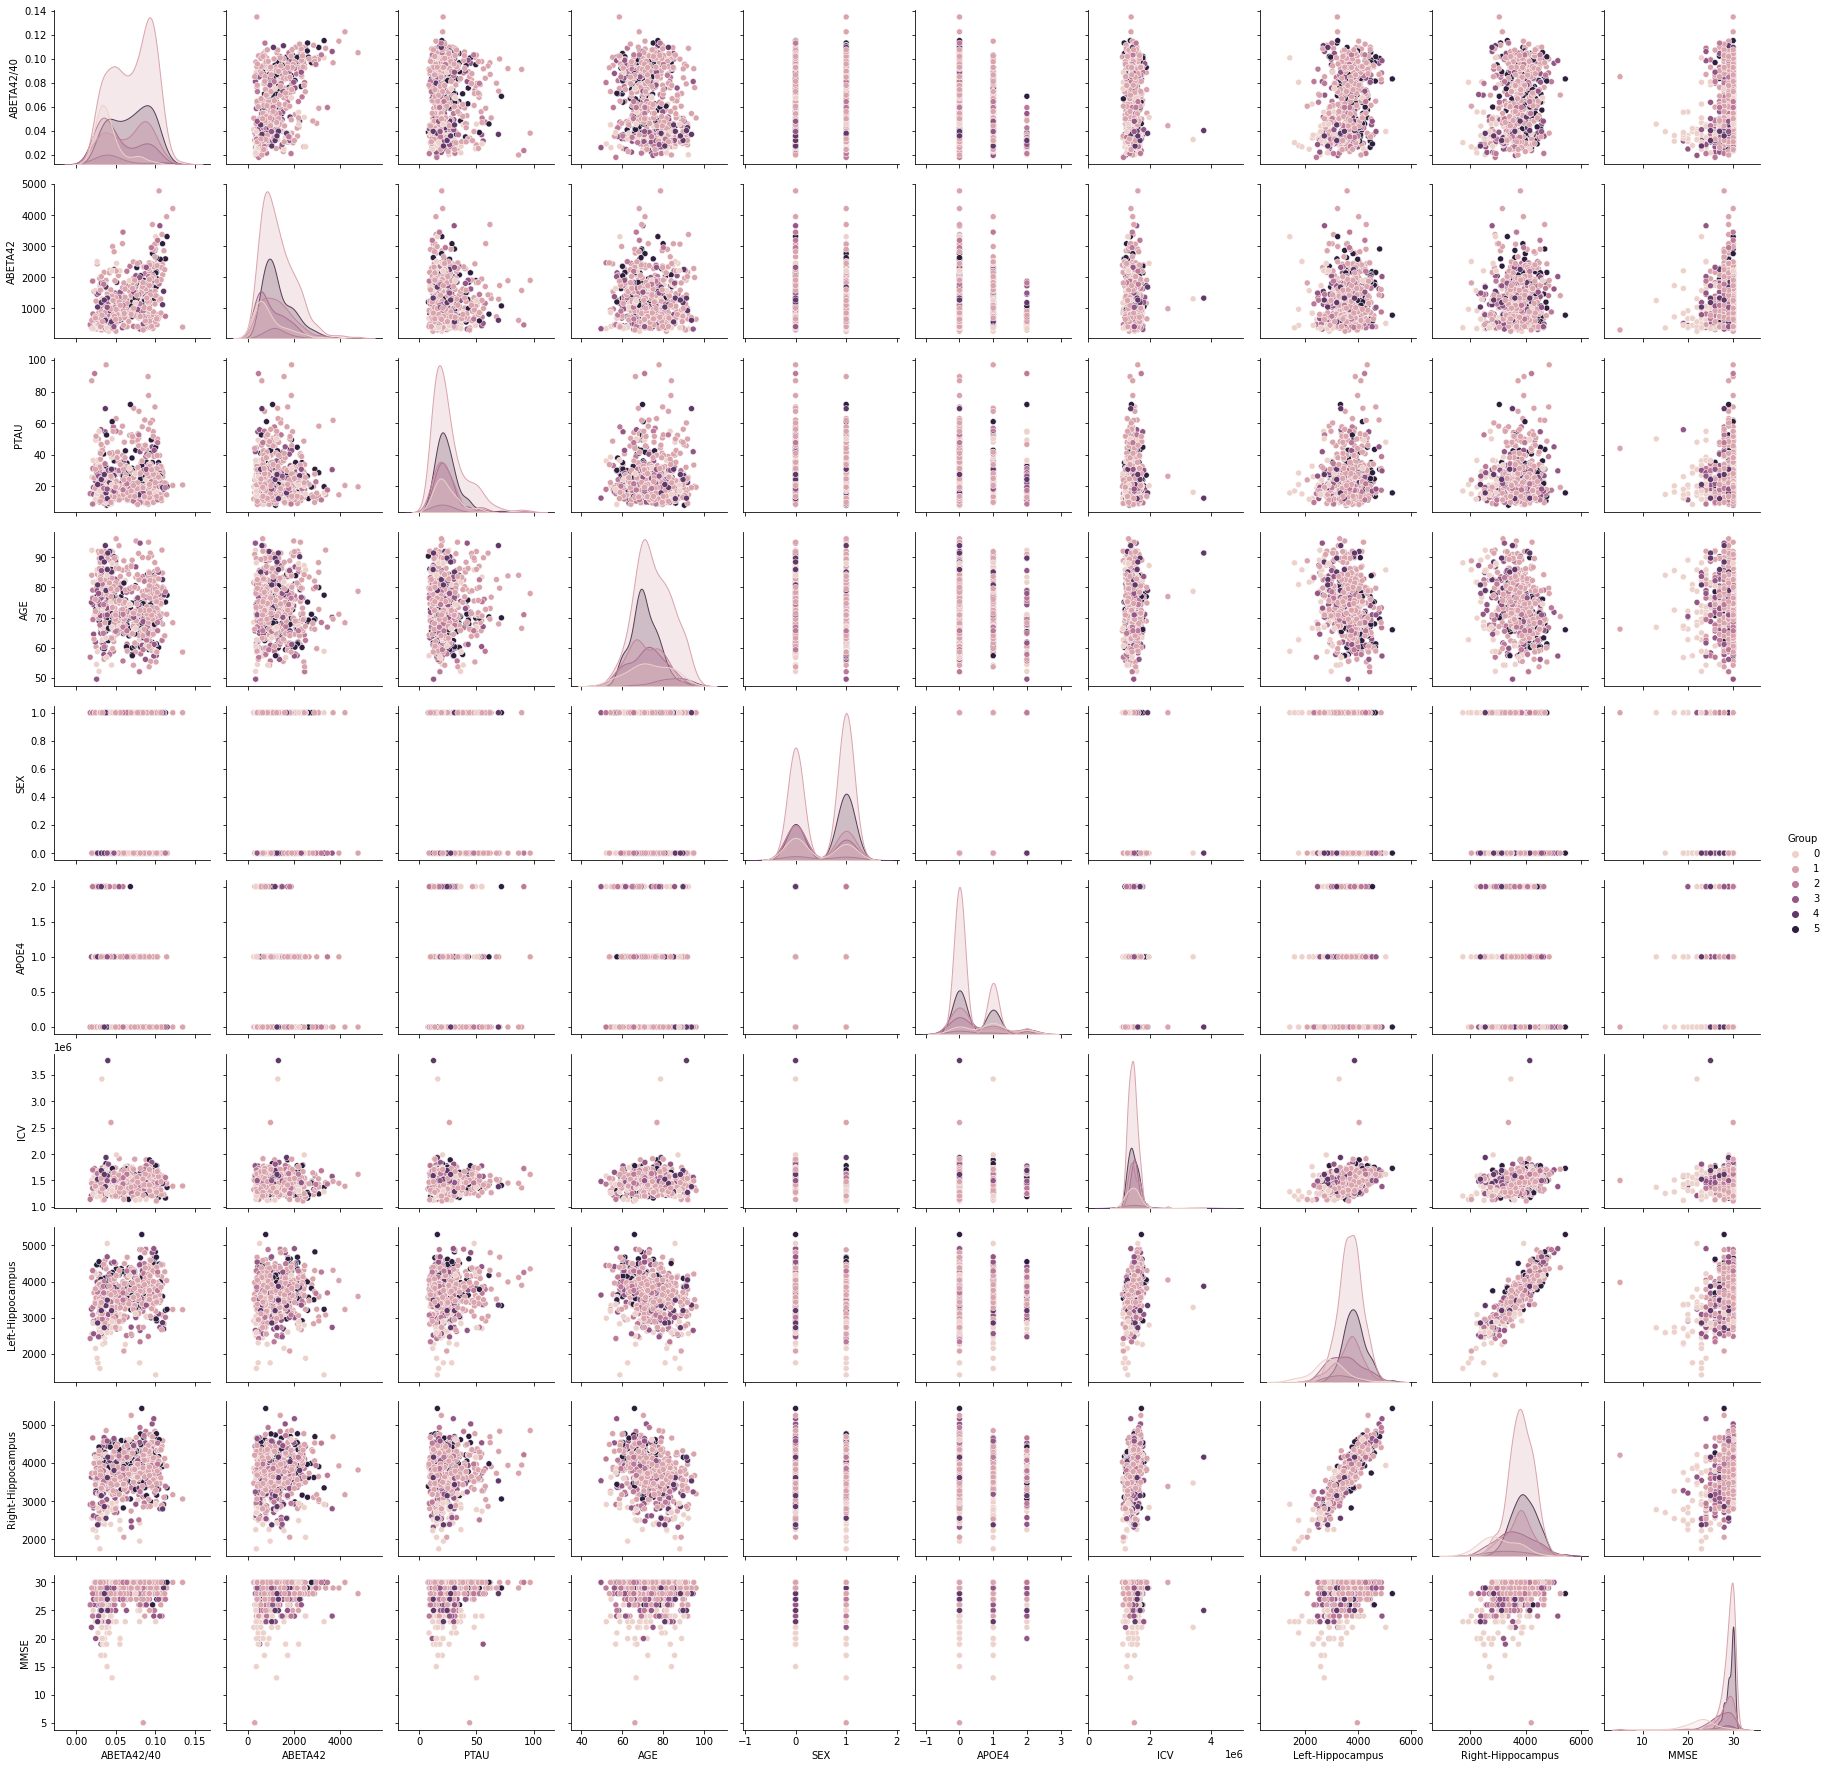

In [11]:
import seaborn as sns
sns.pairplot(result, hue ='Group')

([<matplotlib.patches.Wedge at 0x7fdb5606da90>,
 [Text(0.19967970517131364, 1.0817245561337219, 'CN'),
  Text(-1.0696685599707063, -0.2565329838640549, 'LMCI'),
  Text(-0.32278771879863033, -1.0515741003813173, 'SMC'),
  Text(0.5362150968887446, -0.9604547724222076, 'EMCI'),
  Text(1.0053293901405345, -0.4464446408230936, 'AD'),
  Text(1.0971456882591435, -0.07919178451310883, 'MCI')])

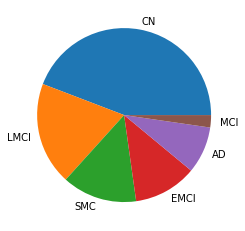

In [12]:
import matplotlib.pyplot as plt
labels=res['Group'].dropna().unique()
labels
plt.pie(res['Group'].dropna().value_counts(),labels=labels)

In [13]:
X=result.drop(columns=['PTID','ABETA42'])
y=result[['ABETA42']]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t_norm=scaler.fit_transform(X_train)
X_rem_norm=scaler.fit_transform(X_rem)
X_rem_norm

array([[0.14161468, 0.16122032, 0.11212177, ..., 0.65584564, 0.68830536,
        1.        ],
       [0.49261775, 0.09420475, 0.33792463, ..., 0.58407483, 0.58218987,
        1.        ],
       [0.01428547, 0.28759255, 0.64024503, ..., 0.83123106, 0.93922825,
        0.84615385],
       ...,
       [0.54855411, 0.21955578, 0.46140709, ..., 0.63456211, 0.72156439,
        0.92307692],
       [0.25316235, 0.17219811, 0.27131984, ..., 0.64733874, 0.65163335,
        1.        ],
       [0.09635058, 0.14258361, 0.67488398, ..., 0.56608324, 0.59685171,
        0.76923077]])

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
  
 # create regressor object
for i in [20,100,400,600]:
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0)
  
    # fit the regressor with x and y data
    regressor.fit(X_train, np.array(y_train).ravel())
    y_pred = regressor.predict(X_rem)
    y_pred=np.array(y_pred).ravel()

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_rem, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_rem, y_pred))
    print('Root Mean Squared Error:', metrics.mean_squared_error(y_rem, y_pred, squared=False))
    print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_rem, y_pred))

Mean Absolute Error: 472.63335937499994
Mean Squared Error: 405928.8737117187
Root Mean Squared Error: 637.1254772112937
Mean Absolute Percentage Error: 0.5191227996473016
Mean Absolute Error: 466.15703125000005
Mean Squared Error: 403785.38613696874
Root Mean Squared Error: 635.4410957256139
Mean Absolute Percentage Error: 0.5261848066048593
Mean Absolute Error: 463.68679882812484
Mean Squared Error: 396972.8660445931
Root Mean Squared Error: 630.0578275401339
Mean Absolute Percentage Error: 0.5227195728085281
Mean Absolute Error: 463.33837760416645
Mean Squared Error: 397836.2578762182
Root Mean Squared Error: 630.7426241155882
Mean Absolute Percentage Error: 0.5223930485416461


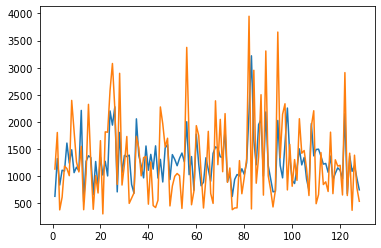

In [17]:
x_plot=np.arange(1,129)
plt.plot(x_plot,y_pred)
plt.plot(x_plot,np.array(y_rem).ravel())

In [18]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),activation = 'relu',
                       solver = 'adam')
y_train=np.array(y_train).ravel()
mlp_reg.fit(X_t_norm, y_train)
y_pred_mlp = mlp_reg.predict(X_rem_norm)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_rem, y_pred_mlp))
print('Mean Squared Error:', metrics.mean_squared_error(y_rem, y_pred_mlp))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_rem, y_pred_mlp, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_rem, y_pred_mlp))

Mean Absolute Error: 486.8513514533201
Mean Squared Error: 447962.8557522896
Root Mean Squared Error: 669.3002732348834
Mean Absolute Percentage Error: 0.4838797159092849


/Users/kathakolisengupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


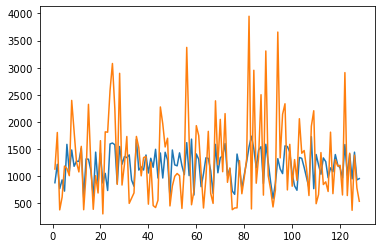

In [19]:
x_plot=np.arange(1,129)
plt.plot(x_plot,y_pred_mlp)
plt.plot(x_plot,np.array(y_rem).ravel())

In [20]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[20,100,500,1000], 'max_depth':[2,3,5,10], 'min_samples_split':[2,3,4,5]}
ran = RandomForestRegressor(random_state=0)
clf = GridSearchCV(ran, parameters)
clf.fit(X_train, np.array(y_train).ravel())

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [20, 100, 500, 1000]})

In [21]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [23]:
y_pred = clf.predict(X_rem)
y_pred=np.array(y_pred).ravel()

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_rem, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_rem, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_rem, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_rem, y_pred))

Mean Absolute Error: 462.8209578067095
Mean Squared Error: 389395.4791291827
Root Mean Squared Error: 624.0156080813866
Mean Absolute Percentage Error: 0.5141022173830263


In [25]:
from sklearn.model_selection import GridSearchCV
mlp_reg = MLPRegressor()
param_list = {"hidden_layer_sizes": [1,5], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["sgd", "adam"]}
gridCV = GridSearchCV(estimator=mlp_reg, param_grid=param_list)
gridCV.fit(X_train, np.array(y_train).ravel())

/Users/kathakolisengupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/kathakolisengupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kathakolisengupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kathakolisengupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kathakolisengupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/kathakolisengupta/opt/an

/Users/kathakolisengupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kathakolisengupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kathakolisengupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kathakolisengupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [1, 5],
                         'solver': ['sgd', 'adam']})

In [26]:
y_pred_mlp = gridCV.predict(X_rem)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_rem, y_pred_mlp))
print('Mean Squared Error:', metrics.mean_squared_error(y_rem, y_pred_mlp))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_rem, y_pred_mlp, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_rem, y_pred_mlp))

Mean Absolute Error: 590.462652679885
Mean Squared Error: 592867.1266923194
Root Mean Squared Error: 769.978653400417
Mean Absolute Percentage Error: 0.6344551353480543


In [27]:
df_wm=pd.read_excel(xl,'WM_hypo')
df_wm

,PTID,Timepoint,wm-lh-bankssts,wm-lh-caudalanteriorcingulate,wm-lh-caudalmiddlefrontal,wm-lh-cuneus,wm-lh-entorhinal,wm-lh-fusiform,wm-lh-inferiorparietal,wm-lh-inferiortemporal,...,wm-rh-superiorfrontal,wm-rh-superiorparietal,wm-rh-superiortemporal,wm-rh-supramarginal,wm-rh-frontalpole,wm-rh-temporalpole,wm-rh-transversetemporal,wm-rh-insula,Left-UnsegmentedWhiteMatter,Right-UnsegmentedWhiteMatter
0,002_S_4213,0,0,8,0,0,0,5,5,1,...,1,5,0,0,0,0,0,4,724,513
1,002_S_4251,0,0,20,1,0,0,8,10,0,...,54,22,0,5,0,0,0,0,880,2502
2,002_S_4654,0,1,20,7,0,0,1,139,10,...,2,2,0,2,0,0,0,22,2832,3464
3,002_S_6007,0,2,8,12,38,0,7,24,1,...,22,8,0,12,0,0,0,0,1999,1799
4,002_S_6009,0,0,9,0,0,0,18,27,0,...,1,7,0,0,0,0,0,0,1093,1117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,127_S_4148,3,0,23,0,0,0,0,0,0,...,6,1,0,0,0,0,0,6,1008,730
651,127_S_4210,3,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,387,297
652,127_S_4604,3,0,14,1,2,0,26,32,0,...,2,5,2,0,0,0,0,8,652,401
653,129_S_4369,3,0,37,7,0,0,2,15,2,...,8,3,0,0,0,0,0,3,376,200


In [28]:
df_wm_1=df_wm.drop(columns=['PTID','Timepoint'])

In [39]:
k=df_wm_1.columns
print(k)

Index(['wm-lh-bankssts', 'wm-lh-caudalanteriorcingulate',
       'wm-lh-caudalmiddlefrontal', 'wm-lh-cuneus', 'wm-lh-entorhinal',
       'wm-lh-fusiform', 'wm-lh-inferiorparietal', 'wm-lh-inferiortemporal',
       'wm-lh-isthmuscingulate', 'wm-lh-lateraloccipital',
       'wm-lh-lateralorbitofrontal', 'wm-lh-lingual',
       'wm-lh-medialorbitofrontal', 'wm-lh-middletemporal',
       'wm-lh-parahippocampal', 'wm-lh-paracentral', 'wm-lh-parsopercularis',
       'wm-lh-parsorbitalis', 'wm-lh-parstriangularis', 'wm-lh-pericalcarine',
       'wm-lh-postcentral', 'wm-lh-posteriorcingulate', 'wm-lh-precentral',
       'wm-lh-precuneus', 'wm-lh-rostralanteriorcingulate',
       'wm-lh-rostralmiddlefrontal', 'wm-lh-superiorfrontal',
       'wm-lh-superiorparietal', 'wm-lh-superiortemporal',
       'wm-lh-supramarginal', 'wm-lh-frontalpole', 'wm-lh-temporalpole',
       'wm-lh-transversetemporal', 'wm-lh-insula', 'wm-rh-bankssts',
       'wm-rh-caudalanteriorcingulate', 'wm-rh-caudalmiddlefront

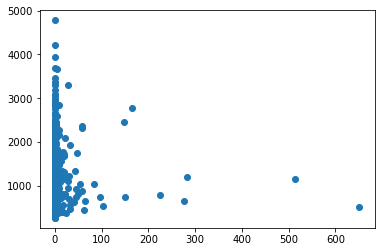

In [35]:
plt.scatter(df_wm_1['wm-lh-bankssts'], df_abeta['ABETA42'])

In [51]:
for i,col in enumerate(df_wm_1.columns):
    print(df_wm_1[col])
    if(i==1):
        break

0
20


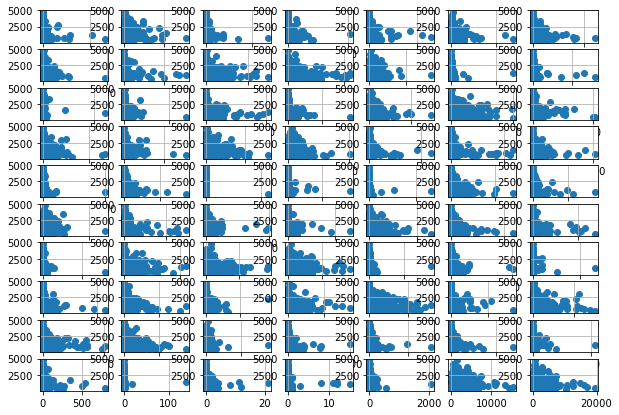

In [66]:
#fig, ax = plt.subplots(10, 7, figsize=(16,6))
plt.rcParams["figure.figsize"] = (10,7) 
for i,col in enumerate(df_wm_1.columns):
    #plt.scatter(df_wm_1[col], df_abeta['ABETA42'],ax=ax)  
    #print(col)
    #print(ax[i])
    #print(i,col)
    plt.subplot(10,7,i+1)
    plt.scatter(x=df_wm_1[col], y=df_abeta['ABETA42'])
    plt.grid()